<a href="https://colab.research.google.com/github/joeytai/Machine-Learning/blob/main/ch3_Deeplearning_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# set house area x_1, house year x_2, house price y
# build a regression model to predict house price
# y = x_1 * w_1 + x_2 * w_2 + b

Loss function

$L^i(w_1, w_2, b) =  \frac{1}{2} (\hat{y^i} - y ^i)^2$

Cost function


In [ ]:
#

In [ ]:
import tensorflow as tf
from time import time

In [ ]:
a = tf.ones((1000, ))
b = tf.ones((1000, ))

In [ ]:
start = time()
c = tf.Variable(tf.zeros((1000, )))
for i in range(1000):
  c[i].assign(a[i] + b[i])
time() - start

0.4452383518218994

In [ ]:
start = time()
c.assign(a+b)
time() - start

0.0029647350311279297

In [ ]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [ ]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = tf.random.normal((num_examples, num_inputs), stddev = 1)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b

In [ ]:
labels.shape

TensorShape([1000])

In [ ]:
# tf.random.normal(labels.shape, stddev=0.01)

In [ ]:
labels = labels + tf.random.normal(labels.shape, stddev=0.01)

In [ ]:
print(features[0], labels[0])

tf.Tensor([0.20598651 0.2453297 ], shape=(2,), dtype=float32) tf.Tensor(3.7734764, shape=(), dtype=float32)


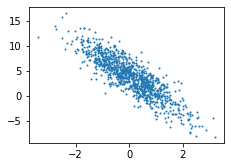

In [ ]:
def set_figsize(figsize=(3.5, 2.5)):
  plt.rcParams['figure.figsize'] = figsize
set_figsize()
plt.scatter(features[:, 1], labels, 1)

In [ ]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuggle(indices)
  for i in range(0, num_examples):
    j = indices[i: min(i+batch_size, num_examples)]
    yield tf.gather(features, axis=0, indices=j), tf.gather(labels, axis=0, indices=j)

In [ ]:
w 

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, y)
  break

NameError: ignored

In [ ]:
w = tf.Variable(tf.random.normal((num_inputs, 1). stddev=0.01))
b = tf.Variable(tf.zeros((1, )))

SyntaxError: ignored

In [ ]:
def linreg(X, w, b):
  return tf.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):
  return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2
  

In [ ]:
def sgd(params, lr, batch_size, grads):
  for i, param in enumerate(params):
    param.assign_sub(lr * grads[i] / batch_size)

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as t:
      t.watch([w, b])
      l = tf.reduce_sum(loss(net(X, w, b), y))
    grads = t.gradient(l, [w, b])
  train_l = loss(net(feature, w, b), labels)
  print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

SyntaxError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
len(x_train), len(x_test)

(60000, 10000)

In [ ]:
feature, label = x_train[0], y_train[0]

In [ ]:
def get_fashion_mnist_labels(labels):
  text_labels =  ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

In [ ]:
def show_fashion_mnist(images, labels):
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
      f.imshow(img.reshape(28, 28))
      f.set_title(lbl)
      f.axes.get_xaxis().set_visible(False)
      f.axes.get_yaxis().set_visible(False)
    plt.show()

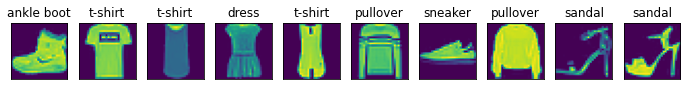

In [ ]:
X, y = [], []
for i in range(10):
  X.append(x_train[i])
  y.append(y_train[i])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [ ]:
batch_size = 256
if sys.platform.startswith('win'):
  num_workers = 0
else:
  num_workers = 4
train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

In [ ]:
start = time.time()
for X, y in train_iter:
  continue
print("%.2f sec" % (time.time() - start))

0.19 sec


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

batch_size = 256
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255
train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_iter = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
num_inputs = 28*28
num_outputs = 10
W = tf.Variable(tf.random.normal(shape=(num_inputs, num_outputs)))
b = tf.Variable(tf.zeros(num_outputs, dtype=tf.float32))

In [ ]:
X = tf.constant([[1, 2, 3], [4, 5, 6]])
tf.reduce_sum(X, axis=0,keepdims=True), tf.reduce_sum(X, axis=1, keepdims=True)

(<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[5, 7, 9]], dtype=int32)>,
 <tf.Tensor: shape=(2, 1), dtype=int32, numpy=
 array([[ 6],
        [15]], dtype=int32)>)

In [ ]:
def softmax(logits, axis=-1):
  return tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis, keepdims=True)

In [ ]:
X = tf.random.normal(shape=(2, 5))
X_prob = softmax(X)
X_prob, tf.reduce_sum(X_prob, axis=1)

(<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
 array([[0.1788784 , 0.5643923 , 0.03194208, 0.06822283, 0.15656435],
        [0.09576228, 0.06629306, 0.2814578 , 0.1382028 , 0.41828406]],
       dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>)

In [ ]:
def net(X):
  logits = tf.matmul(tf.reshape(X, shape=(-1, W.shape[0])), W)
  return softmax(logits)

In [ ]:
y_hat = np.array([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = np.array([0, 2], dtype='int32')
tf.boolean_mask(y_hat, tf.one_hot(y, depth=3))


<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.1, 0.5])>

In [ ]:
def cross_entropy(y_hat, y):
  y = tf.cast(tf.reshape(y, shape=[-1, 1]), dtype=tf.int32)
  y = tf.one_hot(y, depth=y_hat.shape[-1])
  y = tf.cast(tf.reshape(y, shape=[-1, y_hat.shape[-1]]),dtype=tf.int32)
  return -tf.math.log(tf.boolean_mask(y_hat, y) + 1e-8)


In [ ]:
def accuracy(y_hat, y):
  return np.mean((tf.argmax(y_hat, axis=1) == y))

In [ ]:
accuracy(y_hat, y)

0.5

In [ ]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for _, (X, y) in enumerate(data_iter):
        y = tf.cast(y,dtype=tf.int64)
        acc_sum += np.sum(tf.cast(tf.argmax(net(X), axis=1), dtype=tf.int64) == y)
        n += y.shape[0]
    return acc_sum / n

In [ ]:
net

<function __main__.net>

In [ ]:
print(evaluate_accuracy(test_iter, net))


IndexError: ignored

In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(10, activation=tf.nn.softmax)                        

])

In [5]:
loss = 'sparse_categorical_crossentropy'

In [6]:
optimizer = tf.keras.optimizers.SGD(0.1)

In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(0, 1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 1s 3ms/step - loss: 2.4153 - accuracy: 0.0803
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 2.4159 - accuracy: 0.0814
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 2.4189 - accuracy: 0.0795
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 2.4173 - accuracy: 0.0802
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 2.4169 - accuracy: 0.0809


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test acc:', test_acc)

313/313 [==============================] - 0s 954us/step - loss: 2.4175 - accuracy: 0.0776
Test acc: 0.07760000228881836


In [14]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

def use_svg_display():
  %config InlineBackend.figure_format = 'svg'

def set_figszie(figsize=(3.5, 2.5)):
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize

def xyplot(x_vals, y_vals, name):
  set_figszie(figsize=(5, 2.5))
  plt.plot(x_vals.numpy(), y_vals.numpy())
  plt.xlabel('x')
  plt.ylabel(name + '(x)')

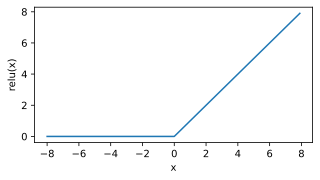

In [15]:
x = tf.Variable(tf.range(-8, 8, 0.1), dtype=tf.float32)
y = tf.nn.relu(x)
xyplot(x, y, 'relu')

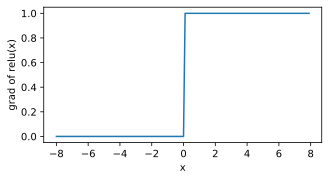

In [17]:
with tf.GradientTape() as t:
  t.watch(x)
  y = tf.nn.relu(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of relu')

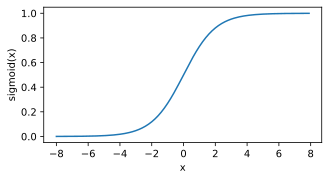

In [18]:
y = tf.nn.sigmoid(x)
xyplot(x, y, 'sigmoid')

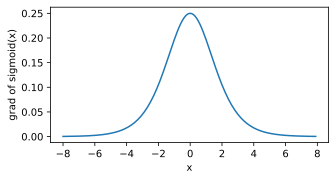

In [19]:
with tf.GradientTape() as t:
  t.watch(x)
  y = tf.nn.sigmoid(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of sigmoid')

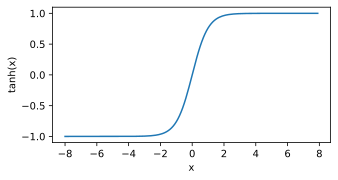

In [20]:
y = tf.nn.tanh(x)
xyplot(x, y, 'tanh')

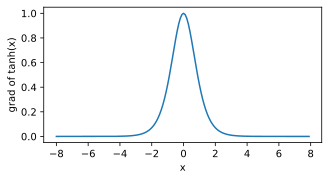

In [21]:
with tf.GradientTape() as t:
  t.watch(x)
  y = tf.nn.tanh(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of tanh')

In [22]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
batch_size = 256
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
x_train = x_train / 255
x_test = x_test / 255
train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_iter = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)


In [27]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = tf.Variable(tf.random.normal(shape=(num_inputs, num_hiddens), mean=0, stddev=0.01, dtype=tf.float32))
b1 = tf.Variable(tf.zeros(num_hiddens, dtype=tf.float32))
W2 = tf.Variable(tf.random.normal(shape=(num_hiddens, num_outputs), mean=0, stddev=0.01, dtype=tf.float32))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=0.1))

In [29]:
def relu(x):
  return tf.math.maximum(x, 0)

In [36]:
def net(X):
  X = tf.reshape(X, shape=[-1, num_inputs])
  h = relu(tf.matmul(X, W1) + b1)
  return tf.math.softmax(tf.matmul(h, W2) + b2)


In [33]:
def loss(y_hat, y_true):
  return tf.losses.sparse_categorical_crossentropy(y_true, y_hat)

In [37]:
!pip install d2lzh_tensorflow2

ERROR: Could not find a version that satisfies the requirement d2lzh_tensorflow2 (from versions: none)
ERROR: No matching distribution found for d2lzh_tensorflow2


In [34]:
num_epochs, lr = 5, 0.5
params = [W1, b1, W2, b2]
d2l.trainch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

NameError: ignored